# Simulate the Boutilier Coordination Game

In [1]:
from environment import Boutilier
from agent import RandomAgent, QLearner
from HystereticQLearner import HystereticQLearner
from policy import epsilon_greedy
from boltzmann import selection as softmax
from utils import simulate_task, find_greedy_action_for_state
import matplotlib.pyplot as plt
import numpy as np
import random
random.seed()

# Rewards

In [2]:
exploration_rate = None
def discount_rate(_): return 0.9
def learning_rate(_): return 0.1
temperature_start = 5000  # Replace T = num with T = temperature_start maybe?
num_simulations = 200
policy = epsilon_greedy(0.05)
# policy = softmax

In [3]:
%%time
rewards = {}
rewards["deterministic"] = {}
rewards["part stochastic"] = {}
keys = ["part stochastic", "deterministic"]

k_val = [-100, 0]
for key in keys:
#     print(key)
    for k in k_val:
        num_converge = 0
        num_six = 0
        num_eps = 10000
        timesteps = num_eps *2
        rewards_temp = np.zeros((num_simulations, num_eps))

        for i in range(num_simulations):
            
            if(key == "part stochastic"):
                task = Boutilier(k, part_stochastic=True)
                decrease_rate = lambda _: 0.05
            else:
                task = Boutilier(k)
                decrease_rate = lambda _: 0.01

            agents = [HystereticQLearner(task, exploration_rate, learning_rate, discount_rate, decrease_rate, 
                             policy=policy),
                      HystereticQLearner(task, exploration_rate, learning_rate, discount_rate, decrease_rate, 
                             policy=policy)]
            print("#------------------------#")
            print("| Simulation {}          |".format(i))
            print("#------------------------#")

            t = 0
            T = temperature_start
            for j in range(num_eps):
                if(key == "full stochastic"):
                    task = Boutilier(k, part_stochastic=True)
                else:
                    task = Boutilier(k)
                t, T = simulate_task(agents, task, t, T, timesteps=timesteps)
                rewards_temp[i][j] = agents[0].accumulated_reward
                agents[0].accumulated_reward = 0
            
            # CHECK Convergence to state
            if(key == "part stochastic"):
                task = Boutilier(k, part_stochastic=True)
            else:
                task = Boutilier(k)
            state = 1
            joint_action = [find_greedy_action_for_state(agent, state) for agent in agents]
            state = task.get_new_state(joint_action, state)
            joint_action = [find_greedy_action_for_state(agent, state) for agent in agents]
            state = task.get_new_state(joint_action, state)

            if(state == 4):
                num_converge += 1
            elif(state == 6):
                num_six += 1
            else:
                print("Unexpected case! state={}".format(state))
        
        rewards[key]["k={}".format(k)] = rewards_temp
        print("{} | k = {} | Percentage of simulations converged: {}".format(key, k, num_converge / num_simulations * 100))
        print("Percentage of simulations converged to sub-optimal nash equilibrium: {}%".format(num_six / num_simulations * 100))

#------------------------#
| Simulation 0          |
#------------------------#
#------------------------#
| Simulation 1          |
#------------------------#
#------------------------#
| Simulation 2          |
#------------------------#
#------------------------#
| Simulation 3          |
#------------------------#
#------------------------#
| Simulation 4          |
#------------------------#
#------------------------#
| Simulation 5          |
#------------------------#
#------------------------#
| Simulation 6          |
#------------------------#
#------------------------#
| Simulation 7          |
#------------------------#
#------------------------#
| Simulation 8          |
#------------------------#
#------------------------#
| Simulation 9          |
#------------------------#
#------------------------#
| Simulation 10          |
#------------------------#
#------------------------#
| Simulation 11          |
#------------------------#
#------------------------#
| Simulatio

#------------------------#
| Simulation 102          |
#------------------------#
#------------------------#
| Simulation 103          |
#------------------------#
#------------------------#
| Simulation 104          |
#------------------------#
#------------------------#
| Simulation 105          |
#------------------------#
#------------------------#
| Simulation 106          |
#------------------------#
#------------------------#
| Simulation 107          |
#------------------------#
#------------------------#
| Simulation 108          |
#------------------------#
#------------------------#
| Simulation 109          |
#------------------------#
#------------------------#
| Simulation 110          |
#------------------------#
#------------------------#
| Simulation 111          |
#------------------------#
#------------------------#
| Simulation 112          |
#------------------------#
#------------------------#
| Simulation 113          |
#------------------------#
#---------------

#------------------------#
| Simulation 1          |
#------------------------#
#------------------------#
| Simulation 2          |
#------------------------#
#------------------------#
| Simulation 3          |
#------------------------#
#------------------------#
| Simulation 4          |
#------------------------#
#------------------------#
| Simulation 5          |
#------------------------#
#------------------------#
| Simulation 6          |
#------------------------#
#------------------------#
| Simulation 7          |
#------------------------#
#------------------------#
| Simulation 8          |
#------------------------#
#------------------------#
| Simulation 9          |
#------------------------#
#------------------------#
| Simulation 10          |
#------------------------#
#------------------------#
| Simulation 11          |
#------------------------#
#------------------------#
| Simulation 12          |
#------------------------#
#------------------------#
| Simulati

#------------------------#
| Simulation 103          |
#------------------------#
#------------------------#
| Simulation 104          |
#------------------------#
#------------------------#
| Simulation 105          |
#------------------------#
#------------------------#
| Simulation 106          |
#------------------------#
#------------------------#
| Simulation 107          |
#------------------------#
#------------------------#
| Simulation 108          |
#------------------------#
#------------------------#
| Simulation 109          |
#------------------------#
#------------------------#
| Simulation 110          |
#------------------------#
#------------------------#
| Simulation 111          |
#------------------------#
#------------------------#
| Simulation 112          |
#------------------------#
#------------------------#
| Simulation 113          |
#------------------------#
#------------------------#
| Simulation 114          |
#------------------------#
#---------------

#------------------------#
| Simulation 2          |
#------------------------#
#------------------------#
| Simulation 3          |
#------------------------#
#------------------------#
| Simulation 4          |
#------------------------#
#------------------------#
| Simulation 5          |
#------------------------#
#------------------------#
| Simulation 6          |
#------------------------#
#------------------------#
| Simulation 7          |
#------------------------#
#------------------------#
| Simulation 8          |
#------------------------#
#------------------------#
| Simulation 9          |
#------------------------#
#------------------------#
| Simulation 10          |
#------------------------#
#------------------------#
| Simulation 11          |
#------------------------#
#------------------------#
| Simulation 12          |
#------------------------#
#------------------------#
| Simulation 13          |
#------------------------#
#------------------------#
| Simulat

#------------------------#
| Simulation 104          |
#------------------------#
#------------------------#
| Simulation 105          |
#------------------------#
#------------------------#
| Simulation 106          |
#------------------------#
#------------------------#
| Simulation 107          |
#------------------------#
#------------------------#
| Simulation 108          |
#------------------------#
#------------------------#
| Simulation 109          |
#------------------------#
#------------------------#
| Simulation 110          |
#------------------------#
#------------------------#
| Simulation 111          |
#------------------------#
#------------------------#
| Simulation 112          |
#------------------------#
#------------------------#
| Simulation 113          |
#------------------------#
#------------------------#
| Simulation 114          |
#------------------------#
#------------------------#
| Simulation 115          |
#------------------------#
#---------------

#------------------------#
| Simulation 3          |
#------------------------#
#------------------------#
| Simulation 4          |
#------------------------#
#------------------------#
| Simulation 5          |
#------------------------#
#------------------------#
| Simulation 6          |
#------------------------#
#------------------------#
| Simulation 7          |
#------------------------#
#------------------------#
| Simulation 8          |
#------------------------#
#------------------------#
| Simulation 9          |
#------------------------#
#------------------------#
| Simulation 10          |
#------------------------#
#------------------------#
| Simulation 11          |
#------------------------#
#------------------------#
| Simulation 12          |
#------------------------#
#------------------------#
| Simulation 13          |
#------------------------#
#------------------------#
| Simulation 14          |
#------------------------#
#------------------------#
| Simula

#------------------------#
| Simulation 105          |
#------------------------#
#------------------------#
| Simulation 106          |
#------------------------#
#------------------------#
| Simulation 107          |
#------------------------#
#------------------------#
| Simulation 108          |
#------------------------#
#------------------------#
| Simulation 109          |
#------------------------#
#------------------------#
| Simulation 110          |
#------------------------#
#------------------------#
| Simulation 111          |
#------------------------#
#------------------------#
| Simulation 112          |
#------------------------#
#------------------------#
| Simulation 113          |
#------------------------#
#------------------------#
| Simulation 114          |
#------------------------#
#------------------------#
| Simulation 115          |
#------------------------#
#------------------------#
| Simulation 116          |
#------------------------#
#---------------

(-30.0, 12.0)

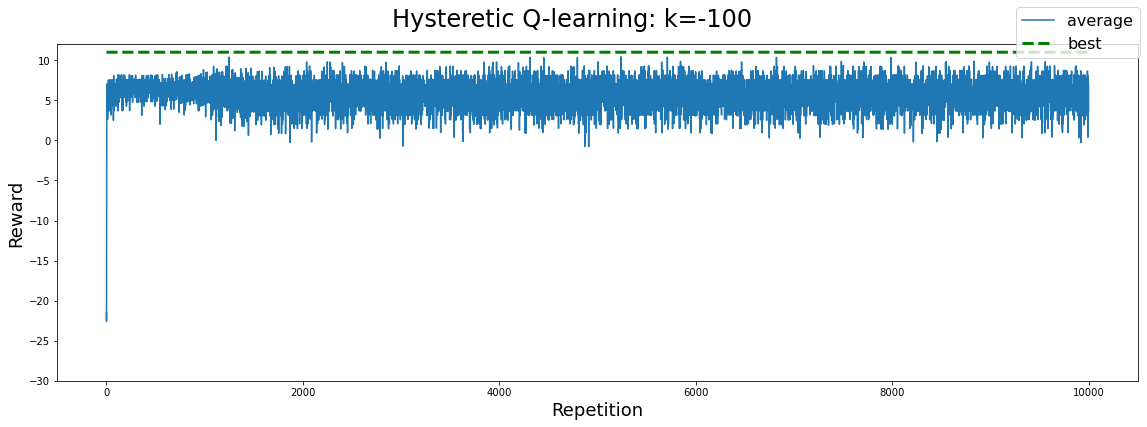

In [5]:
fig = plt.figure(figsize=(16,6))
key = "deterministic"
x = np.array(range(10000))
# for data in rewards[key]["k=0"]:
# # data = rewards["deterministic"]["k=0"]
#     plt.plot(x, data, alpha=0.1, color='orange')
plt.plot(x, np.mean(rewards[key]["k=-100"], axis=0), label='average')

plt.plot(range(10000), np.repeat(11, 10000), '--', lw=3, label='best', color='green')

fig.suptitle('Hysteretic Q-learning: k=-100', fontsize=24)
plt.xlabel('Repetition', fontsize=18)
plt.ylabel('Reward', fontsize=18)
fig.legend(fontsize=16)
plt.tight_layout()
plt.ylim(-30, 12)

# Random agents

In [6]:
random_rewards = {}
random_rewards["deterministic"] = {}
random_rewards["part stochastic"] = {}
keys = ["deterministic", "part stochastic"]

k_val = [0, -100]
for key in keys:
    for k in k_val:
        num_eps = 10000
        timesteps = num_eps *2
        rewards_temp = np.zeros((num_simulations, num_eps))

        for i in range(num_simulations):
            if(key == "part stochastic"):
                task = Boutilier(k, part_stochastic=True)
            else:
                task = Boutilier(k)

            agents = [RandomAgent(task),
                  RandomAgent(task)]
        #     print("#------------------------#")
        #     print("| Simulation {}          |".format(i))
        #     print("#------------------------#")

            t = 0
            for j in range(num_eps):
                if(key == "part stochastic"):
                    task = Boutilier(k, part_stochastic=True)
                else:
                    task = Boutilier(k)
                t, _ = simulate_task(agents, task, t, None, timesteps=timesteps)
                rewards_temp[i][j] = agents[0].accumulated_reward
                agents[0].accumulated_reward = 0

        random_rewards[key]["k={}".format(k)] = rewards_temp

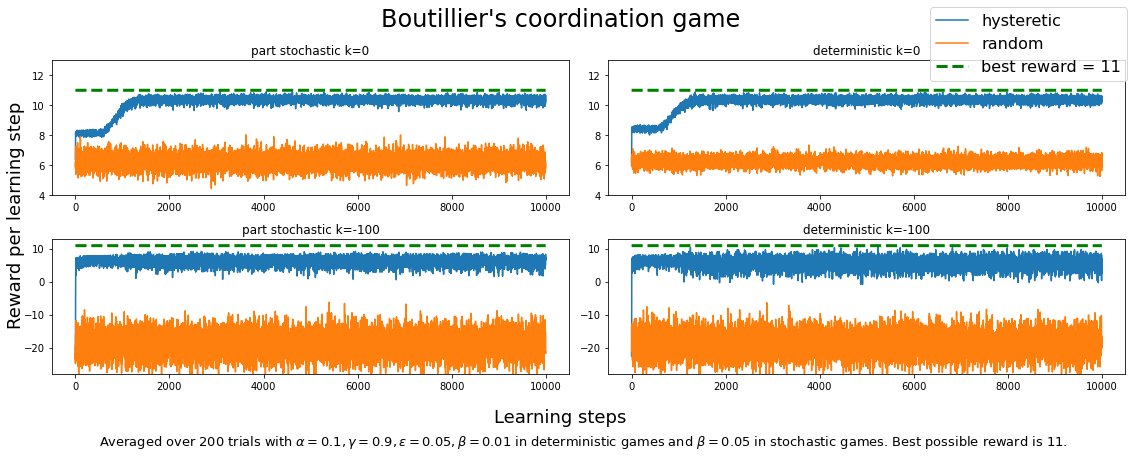

In [15]:
# fig = plt.figure(figsize=(16,6))
keys = ["part stochastic", "deterministic"]
k_vals = [0, -100]

fig, axs = plt.subplots(2, 2, figsize=(16, 6) )

for i in range(len(keys)):
    for j in range(len(k_vals)):
        key = keys[i]
        k = k_vals[j]
        ax = axs[j][i]
        
        x = np.array(range(10000))
        # for data in rewards[key]["k=0"]:
        # # data = rewards["deterministic"]["k=0"]
        #     plt.plot(x, data, alpha=0.1, color='orange')
        ax.plot(x, np.mean(rewards[key]["k={}".format(k)], axis=0), label='hysteretic')
        ax.plot(range(10000), np.average(random_rewards[key]["k={}".format(k)], axis=0), label='random')
        ax.plot(range(10000), np.repeat(11, 10000), '--', lw=3, label='best reward = 11', color='green')
        ax.set_title("{} k={}".format(key, k))
        if(j == 1):
            ax.set_ylim(-28, 13)
        else:
            ax.set_ylim(4, 13)
        if(j == 0 and i == 0):
            fig.legend(fontsize=16)
            
        # plt.plot(range(5000), np.repeat(7.62, 5000), '--', lw=3, label='line', color='green')

fig.suptitle('Boutillier\'s coordination game', fontsize=24)
fig.supxlabel('Learning steps', fontsize=18)
fig.supylabel('Reward per learning step', fontsize=18)
parameters_text = r'$\alpha = 0.1,\gamma=0.9,\epsilon=0.05, \beta=0.01$ in deterministic games and $\beta=0.05$ in stochastic games'
plt.figtext(0.1, -0.035,s="Averaged over 200 trials with {}. Best possible reward is 11.".format(parameters_text), fontsize=13)
fig.tight_layout()
# plt.ylim(-30, 12)

# Save data

In [8]:
import pickle
from copy import deepcopy
filename = 'boutillier.pickle'
outfile = open(filename,'wb')
pickle.dump(deepcopy([rewards, random_rewards]), outfile)
outfile.close()

# Deterministic

## Test Bed

In [4]:
# Simulate
## Parameters

exploration_rate = None
def discount_rate(_): return 0.9
def learning_rate(_): return 0.1
def decrease_rate(_): return 0.01
policy = epsilon_greedy(0.05)
temperature_start = None  # Replace T = num with T = temperature_start maybe?
timesteps = 10000
num_simulations = 200

# Check greedy joint policy

## k = 0

In [3]:
num_converge = 0
k = 0
for i in range(num_simulations):
    task = Boutilier(k)

    agents = [HystereticQLearner(task, exploration_rate, learning_rate, discount_rate, decrease_rate, 
                             policy=policy),
          HystereticQLearner(task, exploration_rate, learning_rate, discount_rate, decrease_rate, 
                             policy=policy)]
#     print("#------------------------#")
#     print("| Simulation {}          |".format(i))
#     print("#------------------------#")

    t = 0
    while(t < timesteps):
        task = Boutilier(0)
        t, _ = simulate_task(agents, task, t, None, timesteps=timesteps)
        
    def find_greedy_action_for_state(agent, state):
        return max(agent.q_values[state], key=agent.q_values[state].get)
    
    # Check if joint greedy action leads to optimal state
    task = Boutilier(0)
    state = 1
    joint_action = [find_greedy_action_for_state(agent, state) for agent in agents]
    state = task.get_new_state(joint_action, state)
    joint_action = [find_greedy_action_for_state(agent, state) for agent in agents]
    state = task.get_new_state(joint_action, state)

    if(state == 4):
        num_converge += 1

print("Percentage of simulations converged: {}%".format(num_converge / num_simulations * 100))

Percentage of simulations converged: 100.0%


## K = -100

In [4]:
num_converge = 0
k = -100
for i in range(num_simulations):
    task = Boutilier(k)

    agents = [HystereticQLearner(task, exploration_rate, learning_rate, discount_rate, decrease_rate, 
                             policy=policy),
          HystereticQLearner(task, exploration_rate, learning_rate, discount_rate, decrease_rate, 
                             policy=policy)]
#     print("#------------------------#")
#     print("| Simulation {}          |".format(i))
#     print("#------------------------#")

    t = 0
    while(t < timesteps):
        task = Boutilier(0)
        t, _ = simulate_task(agents, task, t, None, timesteps=timesteps)
        
    def find_greedy_action_for_state(agent, state):
        return max(agent.q_values[state], key=agent.q_values[state].get)
    
    # Check if joint greedy action leads to optimal state
    task = Boutilier(0)
    state = 1
    joint_action = [find_greedy_action_for_state(agent, state) for agent in agents]
    state = task.get_new_state(joint_action, state)
    joint_action = [find_greedy_action_for_state(agent, state) for agent in agents]
    state = task.get_new_state(joint_action, state)

    if(state == 4):
        num_converge += 1

print("Percentage of simulations converged: {}%".format(num_converge / num_simulations * 100))

Percentage of simulations converged: 100.0%


# Stochastic

In [192]:
# Simulate
## Parameters

exploration_rate = None
def discount_rate(_): return 0.9
def learning_rate(_): return 0.1
def decrease_rate(_): return 0.05
# policy = epsilon_greedy(lambda t: 1/(np.log(t)**2))
policy = epsilon_greedy(0.05)
temperature_start = None  # Replace T = num with T = temperature_start maybe?
timesteps = 10000
num_simulations = 200

# Check greedy joint policy

## k = 0

In [6]:
num_converge = 0
num_six = 0
k = 0
for i in range(num_simulations):
    task = Boutilier(k, part_stochastic=True)

    agents = [HystereticQLearner(task, exploration_rate, learning_rate, discount_rate, decrease_rate, 
                             policy=policy),
          HystereticQLearner(task, exploration_rate, learning_rate, discount_rate, decrease_rate, 
                             policy=policy)]
#     print("#------------------------#")
#     print("| Simulation {}          |".format(i))
#     print("#------------------------#")

    t = 0
    while(t < timesteps):
        task = Boutilier(k, part_stochastic=True)
        t, _ = simulate_task(agents, task, t, None, timesteps=timesteps)
        
    def find_greedy_action_for_state(agent, state):
        return max(agent.q_values[state], key=agent.q_values[state].get)
    
    # Check if joint greedy action leads to optimal state
    task = Boutilier(k, part_stochastic=True)
    state = 1
    joint_action = [find_greedy_action_for_state(agent, state) for agent in agents]
    state = task.get_new_state(joint_action, state)
    joint_action = [find_greedy_action_for_state(agent, state) for agent in agents]
    state = task.get_new_state(joint_action, state)

    if(state == 4):
        num_converge += 1
        
    elif(state == 6):
        num_six += 1

print("Percentage of simulations converged: {}%".format(num_converge / num_simulations * 100))
print("Percentage of simulations converged to sub-optimal nash equilibrium: {}%".format(num_six / num_simulations * 100))

Percentage of simulations converged: 99.5%
Percentage of simulations converged to sub-optimal nash equilibrium: 0.5%


## k = -100

In [186]:
def simulate_task_2(agents, task, t=0, system_temperature=None, timesteps=1000):
    state = task.start_state
    T = system_temperature

    def action_lambda(a, s, T, idx):
        #         print("agent {}".format(idx))
        if(T == 0):
            print("warning 0")
        return a.action_selection(s, None, T)

    while not task.isTerminalState(state) and t < timesteps:

#         actions = tuple((lambda a: a.action_selection(state, None, T), agents))
        actions = tuple((action_lambda(agent, state, t, idx)
                        for idx, agent in enumerate(agents)))
        if(T is not None):
            T = T * 0.99
        reward, new_state = task.respond_to_action(actions)
#         print("reward: {}".format(reward))
        agents[0].update(state, actions[0], new_state, reward)  # , t)
        agents[1].update(state, actions[1], new_state, reward)  # , t)

        state = new_state
        t += 1
    return t, T

In [190]:
num_converge = 0
num_six = 0
k = -100
timesteps = 20000
for i in range(num_simulations):
    task = Boutilier(k, part_stochastic=True)

    agents = [HystereticQLearner(task, exploration_rate, learning_rate, discount_rate, decrease_rate, 
                             policy=policy),
          HystereticQLearner(task, exploration_rate, learning_rate, discount_rate, decrease_rate, 
                             policy=policy)]
    print("#------------------------#")
    print("| Simulation {}          |".format(i))
    print("#------------------------#")

    t = 0
    while(t < timesteps):
        task = Boutilier(k, part_stochastic=True)
        t, _ = simulate_task_2(agents, task, t, None, timesteps=timesteps)
        
    def find_greedy_action_for_state(agent, state):
        return max(agent.q_values[state], key=agent.q_values[state].get)
    
    # Check if joint greedy action leads to optimal state
    task = Boutilier(k, part_stochastic=True)
    state = 1
    joint_action = [find_greedy_action_for_state(agent, state) for agent in agents]
    state = task.get_new_state(joint_action, state)
    joint_action = [find_greedy_action_for_state(agent, state) for agent in agents]
    state = task.get_new_state(joint_action, state)

    if(state == 4):
        num_converge += 1
    elif(state == 6):
        num_six += 1
print("Percentage of simulations converged to optimal: {}%".format(num_converge / num_simulations * 100))
print("Percentage of simulations converged to sub-optimal nash equilibrium: {}%".format(num_six / num_simulations * 100))

#------------------------#
| Simulation 0          |
#------------------------#
warning 0
warning 0
#------------------------#
| Simulation 1          |
#------------------------#
warning 0
warning 0
#------------------------#
| Simulation 2          |
#------------------------#
warning 0
warning 0
#------------------------#
| Simulation 3          |
#------------------------#
warning 0
warning 0
#------------------------#
| Simulation 4          |
#------------------------#
warning 0
warning 0
#------------------------#
| Simulation 5          |
#------------------------#
warning 0
warning 0
#------------------------#
| Simulation 6          |
#------------------------#
warning 0
warning 0
#------------------------#
| Simulation 7          |
#------------------------#
warning 0
warning 0
#------------------------#
| Simulation 8          |
#------------------------#
warning 0
warning 0
#------------------------#
| Simulation 9          |
#------------------------#
warning 0
warning 0


#------------------------#
| Simulation 82          |
#------------------------#
warning 0
warning 0
#------------------------#
| Simulation 83          |
#------------------------#
warning 0
warning 0
#------------------------#
| Simulation 84          |
#------------------------#
warning 0
warning 0
#------------------------#
| Simulation 85          |
#------------------------#
warning 0
warning 0
#------------------------#
| Simulation 86          |
#------------------------#
warning 0
warning 0
#------------------------#
| Simulation 87          |
#------------------------#
warning 0
warning 0
#------------------------#
| Simulation 88          |
#------------------------#
warning 0
warning 0
#------------------------#
| Simulation 89          |
#------------------------#
warning 0
warning 0
#------------------------#
| Simulation 90          |
#------------------------#
warning 0
warning 0
#------------------------#
| Simulation 91          |
#------------------------#
warning 0


#------------------------#
| Simulation 163          |
#------------------------#
warning 0
warning 0
#------------------------#
| Simulation 164          |
#------------------------#
warning 0
warning 0
#------------------------#
| Simulation 165          |
#------------------------#
warning 0
warning 0
#------------------------#
| Simulation 166          |
#------------------------#
warning 0
warning 0
#------------------------#
| Simulation 167          |
#------------------------#
warning 0
warning 0
#------------------------#
| Simulation 168          |
#------------------------#
warning 0
warning 0
#------------------------#
| Simulation 169          |
#------------------------#
warning 0
warning 0
#------------------------#
| Simulation 170          |
#------------------------#
warning 0
warning 0
#------------------------#
| Simulation 171          |
#------------------------#
warning 0
warning 0
#------------------------#
| Simulation 172          |
#------------------------#


### Distributed Q-learning and stochastic

In [8]:
from agent import QLearner

# Simulate
## Parameters

exploration_rate = None
def discount_rate(_): return 0.9
def learning_rate(_): return 0.1

policy = epsilon_greedy(0.05)
temperature_start = None  # Replace T = num with T = temperature_start maybe?
timesteps = 10000
num_simulations = 200

# Check greedy joint policy

num_converge = 0
num_six = 0
k = -100
for i in range(num_simulations):
    task = Boutilier(k, part_stochastic=True)

    agents = [QLearner(task, exploration_rate, learning_rate, discount_rate, 
                             policy=policy),
          QLearner(task, exploration_rate, learning_rate, discount_rate, 
                             policy=policy)]
#     print("#------------------------#")
#     print("| Simulation {}          |".format(i))
#     print("#------------------------#")

    t = 0
    while(t < timesteps):
        task = Boutilier(k, part_stochastic=True)
        t, _ = simulate_task(agents, task, t, None, timesteps=timesteps)
        
    def find_greedy_action_for_state(agent, state):
        return max(agent.q_values[state], key=agent.q_values[state].get)
    
    # Check if joint greedy action leads to optimal state
    task = Boutilier(k, part_stochastic=True)
    state = 1
    joint_action = [find_greedy_action_for_state(agent, state) for agent in agents]
    state = task.get_new_state(joint_action, state)
    joint_action = [find_greedy_action_for_state(agent, state) for agent in agents]
    state = task.get_new_state(joint_action, state)

    if(state == 4):
        num_converge += 1
    elif(state == 6):
        num_six += 1
    
print("Percentage of simulations converged to optimal: {}%".format(num_converge / num_simulations * 100))
print("Percentage of simulations converged to sub-optimal nash equilibrium: {}%".format(num_six / num_simulations * 100))

Percentage of simulations converged to optimal: 9.5%
Percentage of simulations converged to sub-optimal nash equilibrium: 90.5%
